In [267]:
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error


In [268]:
df = pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\Tasks\05. Задача регрессии. Линейная регрессия\AB_NYC_2019.csv')

In [269]:
df_cut = df.drop(['last_review', 'reviews_per_month', 'id', 'name', 'host_id', 'host_name'], axis=1)

In [270]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [271]:
df_cut.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [272]:
df_cut = df_cut[df_cut.price != 0]

In [273]:
df_cut[df_cut.price == 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365


In [274]:
df_cut.price = np.log(df_cut.price)

In [275]:
len(df_cut[df_cut.price >= 9.2])

6

In [276]:
len(df_cut[df_cut.minimum_nights >= 366])

14

In [277]:
df_cut = df_cut[df_cut.minimum_nights < 366]

<AxesSubplot: >

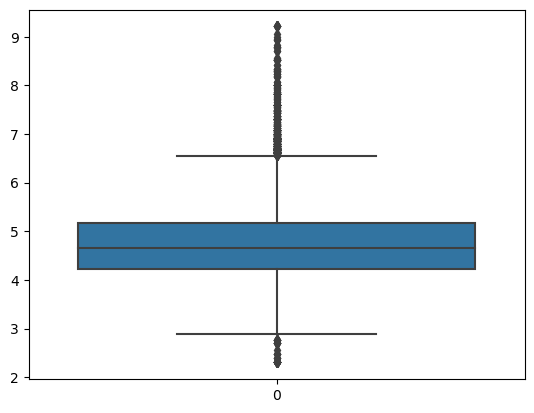

In [278]:
sns.boxplot(df_cut.price)

# Нахождение расстояния домов от центра Нью Йорка, используя долготу и широту

In [279]:
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'miles'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

In [280]:
latitude_center = 40.7143
longitude_center = -74.006

# 40.7143-40.75362,	-74.006 - -73.98377
# getDistanceBetweenPointsNew(40.75362, -73.98377, 40.7834, -73.9662, 'kilometers')

In [281]:
df_cut.insert(0, 'distance_to_center', getDistanceBetweenPointsNew(df_cut.iloc[:,2], df_cut.iloc[:,3], latitude_center, longitude_center, 'kilometers'))
df_cut = df_cut.drop(['latitude', 'longitude'], axis=1)

* Можно попробовать найти расстояние от дома, до центра района (манхеттена, бруклина...)

In [282]:
latitudeManhattan = 40.7834
longitudeManhattan = -73.9662

latitudeBrooklyn = 40.6501
longitudeBrooklyn =-73.94958

latitudeQueens = 40.68149
longitudeQueens = -73.83652

latitudeStatenIsland = 40.56233
longitudeStatenIsland = -74.13986
 
latitudeBronx = 40.84985
longitudeBronx = -73.86641

In [283]:
df_temp = pd.DataFrame(pd.Series([latitudeManhattan, longitudeManhattan]).values.reshape(1, -1), columns=['latitude', 'longitude'])

df_temp = pd.concat([df_temp, pd.DataFrame(pd.Series([latitudeBrooklyn, longitudeBrooklyn]).values.reshape(1, -1), 
                                           columns=['latitude', 'longitude'])], axis=0)

df_temp = pd.concat([df_temp, pd.DataFrame(pd.Series([latitudeQueens, longitudeQueens]).values.reshape(1, -1),
                                            columns=['latitude', 'longitude'])], axis=0)

df_temp = pd.concat([df_temp, pd.DataFrame(pd.Series([latitudeStatenIsland, longitudeStatenIsland]).values.reshape(1, -1), 
                                           columns=['latitude', 'longitude'])], axis=0)

df_temp = pd.concat([df_temp, pd.DataFrame(pd.Series([latitudeBronx, longitudeBronx]).values.reshape(1, -1), 
                                           columns=['latitude', 'longitude'])], axis=0)

df_temp.index = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

In [284]:
df_temp

,latitude,longitude
Manhattan,40.78340,-73.96620
Brooklyn,40.65010,-73.94958
Queens,40.68149,-73.83652
Staten Island,40.56233,-74.13986
Bronx,40.84985,-73.86641


In [285]:
# [[df_temp.loc[group][0], df_temp.loc[group][1]] for group in df_cut.iloc[:,0].unique()]

In [286]:
# index = 0
# group = df_cut.iloc[index,0]
# df_temp.loc[group][0], df_temp.loc[group][1], df_cut.iloc[index, 2], df_cut.iloc[index, 3]

In [287]:
def get_distance():
    arr = []
    for index in range(df_cut.shape[0]):
        group = df_cut.iloc[index,0]
        arr.append(getDistanceBetweenPointsNew(df_cut.iloc[index, 2], df_cut.iloc[index, 3], df_temp.loc[group][0], df_temp.loc[group][1], 'kilometers'))
    df_cut.insert(0, 'distance_to_center', pd.Series(arr).values.reshape(-1, 1))
        
        
# get_distance()

# df_cut = df_cut.drop(['latitude', 'longitude'], axis=1)

In [288]:
# df_cut = df_cut.drop(['latitude', 'longitude'], axis=1)

In [289]:
df_cut.distance_to_center.describe()

count    48870.000000
mean         7.406562
std          4.502707
min          0.050000
25%          4.360000
50%          6.490000
75%          9.540000
max         31.010000
Name: distance_to_center, dtype: float64

In [290]:
df_cut

,distance_to_center,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,7.95,Brooklyn,Kensington,Private room,5.003946,1,9,6,365
1,4.76,Manhattan,Midtown,Entire home/apt,5.416100,1,45,2,355
2,11.83,Manhattan,Harlem,Private room,5.010635,3,0,1,365
3,5.07,Brooklyn,Clinton Hill,Entire home/apt,4.488636,1,270,1,194
4,10.72,Manhattan,East Harlem,Entire home/apt,4.382027,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,6.18,Brooklyn,Bedford-Stuyvesant,Private room,4.248495,2,0,2,9
48891,6.29,Brooklyn,Bushwick,Private room,3.688879,4,0,2,36
48892,12.17,Manhattan,Harlem,Entire home/apt,4.744932,10,0,1,27
48893,4.97,Manhattan,Hell's Kitchen,Shared room,4.007333,1,0,6,2


# Get_dummies для кодирования номинальных признаков

In [291]:
df_temp = pd.get_dummies(df_cut.neighbourhood_group, drop_first=True)
df_cut = pd.concat([df_cut.drop('neighbourhood_group', axis=1), df_temp], axis=1)
df_temp = pd.get_dummies(df_cut.room_type, drop_first=True)
df_cut = pd.concat([df_cut.drop('room_type', axis=1), df_temp], axis=1)

# df_cut = df_cut.drop('neighbourhood', axis=1)

# Эксперементальное кодирование, возможно лишнее!

In [292]:
df_temp = pd.get_dummies(df_cut.neighbourhood, drop_first=True)
df_cut = pd.concat([df_cut.drop('neighbourhood', axis=1), df_temp], axis=1)

In [293]:
df_cut.columns

Index(['distance_to_center', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'Brooklyn',
       'Manhattan', 'Queens', 'Staten Island',
       ...
       'Westerleigh', 'Whitestone', 'Williamsbridge', 'Williamsburg',
       'Willowbrook', 'Windsor Terrace', 'Woodhaven', 'Woodlawn', 'Woodrow',
       'Woodside'],
      dtype='object', length=232)

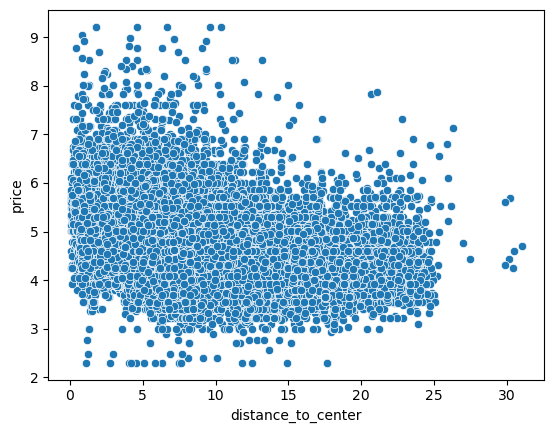

In [294]:
sns.scatterplot(df_cut, x='distance_to_center', y='price');

In [295]:
df_temp = df_cut[['distance_to_center', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']]

In [296]:
df_cut.iloc[:,6:]

,Brooklyn,Manhattan,Queens,Staten Island,Private room,Shared room,Arden Heights,Arrochar,Arverne,Astoria,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48891,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48892,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48893,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

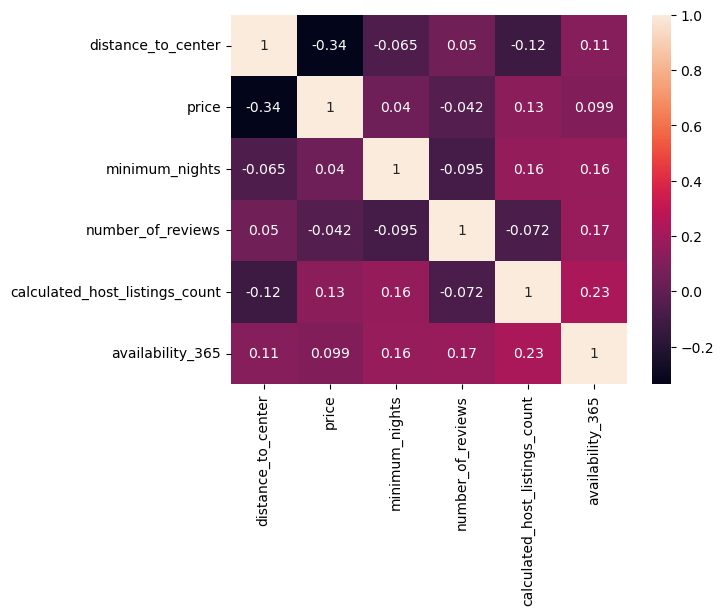

In [297]:
sns.heatmap(df_temp.corr(), annot=True)

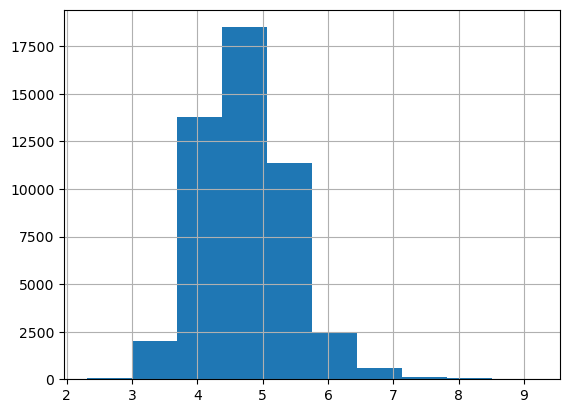

In [298]:
df_cut.price.hist();

# Проведём шкалирование используя метод StandardScaler из sklearn.preprocessing, он приведёт все числовые значения к одной шкале

In [299]:
df_train, df_test = train_test_split(df_cut, test_size = 0.3)
scaler = StandardScaler()
df_train_scale = scaler.fit_transform(df_train[['distance_to_center', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']])
df_test_scale = scaler.transform(df_test[['distance_to_center', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']])

In [300]:
df_train[['distance_to_center', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']] = df_train_scale
df_test[['distance_to_center', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']] = df_test_scale

In [301]:
df_train

,distance_to_center,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Brooklyn,Manhattan,Queens,Staten Island,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
2310,-0.235865,4.553877,-0.228912,4.385145,-0.184899,1.010290,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47422,-0.235865,5.003946,-0.287812,-0.522575,-0.154345,-0.683561,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
40782,-1.060038,5.117994,-0.111112,-0.229913,-0.184899,-0.167051,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16094,0.860816,5.393628,-0.287812,-0.455038,-0.032129,1.914183,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1686,-0.457417,3.951244,-0.228912,-0.094838,-0.154345,-0.189838,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21513,-1.230633,5.273000,1.361396,-0.410013,-0.184899,-0.600008,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32948,0.947221,5.700444,-0.287812,-0.342475,-0.154345,1.526800,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
42812,-0.663460,4.174387,-0.287812,-0.319963,-0.093237,-0.531646,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6874,-0.909383,6.214608,-0.052211,0.130287,-0.184899,-0.182242,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Алгоритмы

* Напишем функцию, которая будет считать и выводить на экран значинее метрик

In [302]:
def metrix(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R2: {r2_score(y_test, y_pred)}')
    

* Для начала построим два бейслайна: один медиана, другой регрессия на начальном датасете, как наш препроцессинг повлиял на качество обычной линейной регрессии

In [303]:
df_baseline2 = df.dropna()
df_baseline2 = df_baseline2.drop(['last_review', 'id', 'name', 'host_id', 'host_name'], axis=1)

In [304]:
df_baseline2 = df_baseline2.drop('neighbourhood', axis=1)

In [305]:
df_temp = pd.get_dummies(df_baseline2.room_type, drop_first=True)
df_baseline2 = pd.concat([df_baseline2.drop(['room_type'], axis=1), df_temp], axis=1)

df_temp = pd.get_dummies(df_baseline2.neighbourhood_group, drop_first=True)
df_baseline2 = pd.concat([df_baseline2.drop(['neighbourhood_group'], axis=1), df_temp], axis=1)

In [306]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(df_baseline2.drop('price', axis=1), df_baseline2.price, test_size=0.2, random_state=42)

* бейс лайн: медиана

In [307]:
def baseline(X):
    median = df_baseline2.price.median()
    arr = [median for i in range(X_test_baseline.shape[0])]
    return pd.Series(arr)


y_pred_baseline = baseline(X_test_baseline)
metrix(y_test_baseline, y_pred_baseline)

MAE: 74.65267224726337
MAPE: 0.5447869126193069
MSE: 35171.4588538313
R2: -0.051426875147096096


* Бейс лайн: обычная линейная регрессия, категориальные фичи преобразованы, но выбросы остались

In [308]:
model = LinearRegression()
model.fit(X_train_baseline, y_train_baseline)
y_pred = model.predict(X_test_baseline)
metrix(y_test_baseline, y_pred)

MAE: 61.4413404143396
MAPE: 0.48772909095976813
MSE: 28526.112373186177
R2: 0.14723124459289094


* разобьём тестовую и тренировочную выборки на фичи и таргеты

In [309]:
X_train = df_train.drop('price', axis=1)
X_test = df_test.drop('price', axis=1)
y_train = df_train.price
y_test = df_test.price

In [310]:
JustLR = LinearRegression()

JustLR.fit(X_train, y_train)

y_pred = JustLR.predict(X_test)

metrix(y_test, y_pred)

MAE: 6173614.987606464
MAPE: 1417036.3920830241
MSE: 5.587822849333967e+17
R2: -1.168409147000765e+18


* Как можно заметить... обычная линейная регрессия стала предсказывать значительно хуже бейслайна
* Скорее всего, это произошло из-за закодированных номинальных фичей, которых получилось около 200 штук
* Тут приходит на помощь регуляризация 

* Сначала Ridge (L1) регуляризация 

In [366]:
L1 = Ridge(alpha=4)

L1.fit(X_train, y_train)

y_pred = L1.predict(X_test)

metrix(y_test, y_pred)

MAE: 0.33852868309637585
MAPE: 0.0707119541432142
MSE: 0.22229944858808565
R2: 0.5351736873073839


In [379]:
a = float('inf')

False

* Теперь Lasso (L2)

In [378]:
L2 = Lasso(alpha=0.00001)

L2.fit(X_train, y_train)

y_pred = L2.predict(X_test)

metrix(y_test, y_pred)

MAE: 0.33866655907215876
MAPE: 0.07074178489974926
MSE: 0.2224645684915057
R2: 0.5348284229518203


* ElasticNet (L1 + L2)

In [377]:
EN = ElasticNet(alpha=0.00001)

EN.fit(X_train, y_train)

y_pred = EN.predict(X_test)

metrix(y_test, y_pred)

MAE: 0.3387076965736079
MAPE: 0.07075027693833183
MSE: 0.2225175187181468
R2: 0.5347177044648328


c:\Games\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.388e+02, tolerance: 1.681e+00
  model = cd_fast.enet_coordinate_descent(


# Визуализация
* Хоть у нас получилась не самая лучшая модель, всё равно попробуем визуализировать важность признаков, которые определила модель
* Визуализируем коэффициенты фичей полученные от каждой модели

In [314]:
df_cut

,distance_to_center,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Brooklyn,Manhattan,Queens,Staten Island,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,7.95,5.003946,1,9,6,365,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.76,5.416100,1,45,2,355,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.83,5.010635,3,0,1,365,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.07,4.488636,1,270,1,194,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.72,4.382027,10,9,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,6.18,4.248495,2,0,2,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48891,6.29,3.688879,4,0,2,36,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48892,12.17,4.744932,10,0,1,27,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
48893,4.97,4.007333,1,0,6,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
JustLR.coef_[:5]

array([-0.23963049, -0.04612286, -0.03048577, -0.01995119,  0.10939824])

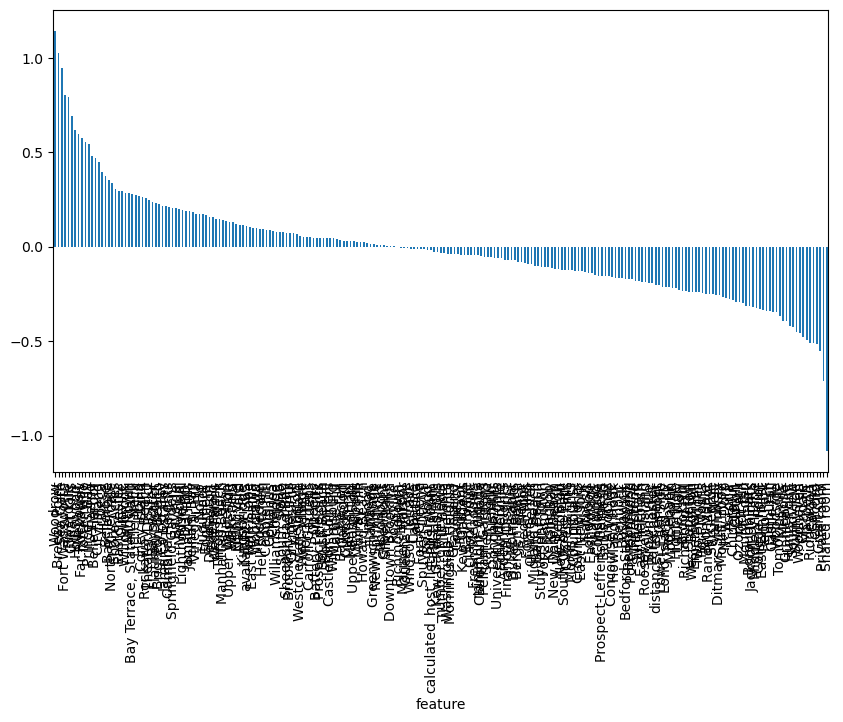

In [316]:
featureImportance = pd.DataFrame({'feature': df_cut.drop('price', axis=1).columns,
                                 'importance': L1.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(10, 6));

# Cross Validation

In [324]:
from sklearn.model_selection import GridSearchCV

In [375]:
some_params = {'alpha': [3.6429, 0, 0.00001, 1.4]}

CVmodel = GridSearchCV(L2, some_params, cv=5)

CVmodel.fit(X_train, y_train)

print(f'The best params: {CVmodel.best_params_}')


c:\Games\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Games\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Games\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.996e+03, tolerance: 1.343e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

The best params: {'alpha': 1e-05}
